# Simple Aanalyze and Visualization of Bus data using numpy, pandas and matplotlib

## Import libraries, library setting and connect database

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import models
from models import *

models.init_db('./data.db')
pd.set_option('display.max_rows', 500)

def set_month_column(df):
    df['month'] = df['month'].map(lambda x: str(x) if x >= 10 else '0' + str(x))
    df['Month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

## Charts or tables for Analyze

**1. Number of routes on Bus Agencies**

In [79]:
# prepare data
bus_routes_anal = pd.DataFrame(
    list(
        BusRoute.select(
            BusRoute.year, 
            BusRoute.month, 
            BusAgency.name_cht.alias('Agency'),
            fn.COUNT(BusRoute.id).alias('Number of routes')
        ).join(
            BusAgency, on=(BusRoute.agency == BusAgency.id)
        ).group_by(
            BusRoute.year, 
            BusRoute.month,
            BusAgency.name_cht
        ).order_by(
            BusRoute.year, 
            BusRoute.month, 
            fn.COUNT(BusRoute.id).desc()
        ).dicts()
    )
)

year_list = bus_routes_anal.loc[:,['year', 'month']].groupby(['year']).max().reset_index()
set_month_column(bus_routes_anal)
set_month_column(year_list)
result = year_list.loc[:,['year','Month']].merge(bus_routes_anal.loc[:,['Month', 'Agency','Number of routes']], left_on='Month', right_on='Month').loc[:, ['year', 'Agency', 'Number of routes']]

# print the table
for year in year_list['year']:
    print('Year: ' + str(year))
    sub_result = result[result['year'] == year].reset_index().loc[:, ['Agency','Number of routes']]
    sub_result.index = np.arange(1, len(sub_result) + 1)
    sub_result.index.name = 'Rank'
    print(sub_result)
    print('**************************************************')
    print()

Year: 2016
     Agency  Number of routes
Rank                         
1       新時代                31
2       新福利                27
3        澳巴                20
**************************************************

Year: 2017
     Agency  Number of routes
Rank                         
1       新時代                33
2       新福利                29
3        澳巴                20
**************************************************

Year: 2018
     Agency  Number of routes
Rank                         
1        澳巴                55
2       新福利                29
**************************************************

Year: 2019
     Agency  Number of routes
Rank                         
1        澳巴                55
2       新福利                30
**************************************************



**2. Number of bus stop in month.**

Text(0, 0.5, 'Number of bus stop')

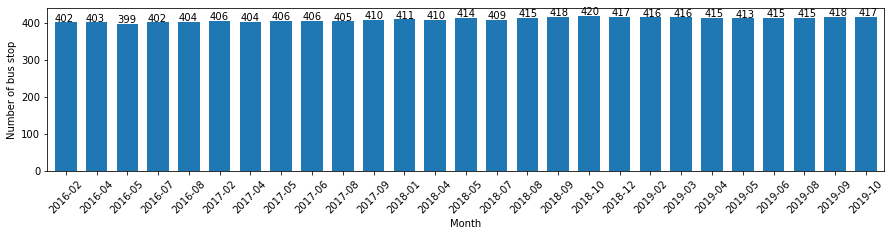

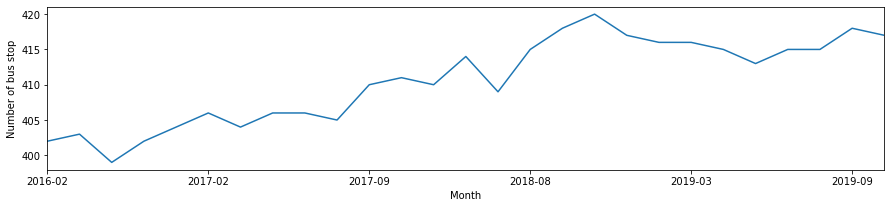

In [61]:
# prepare data
bus_stops_anal = pd.DataFrame(
    list(
        SubRouteBusStopRaw.select(
            SubRouteBusStopRaw.year, 
            SubRouteBusStopRaw.month, 
            fn.COUNT(SubRouteBusStopRaw.id).alias('Number of bus stop')
        ).group_by(
            SubRouteBusStopRaw.year, 
            SubRouteBusStopRaw.month
        ).dicts()
    )
)

set_month_column(bus_stops_anal)
bus_stops_anal_count = bus_stops_anal.loc[:, ['Month', 'Number of bus stop']]

# build the chart
bar_chr = bus_stops_anal_count.plot.bar(
    x='Month', 
    y='Number of bus stop',
    rot=45,
    width=0.7,
    figsize=(15, 3),
    legend=False
)

line_chr = bus_stops_anal_count.plot(
    x='Month', 
    y='Number of bus stop',
    figsize=(15, 3),
    legend=False
)

# set chart params
bar_chr.set_ylabel('Number of bus stop')
for p in bar_chr.patches:
    bar_chr.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

line_chr.set_ylabel('Number of bus stop')

**3. Number of bus routes in month.**

Text(0, 0.5, 'Number of route')

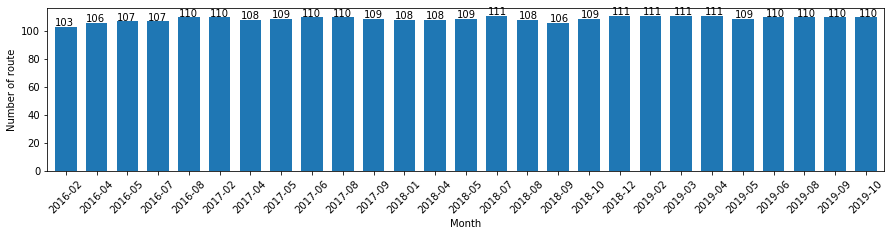

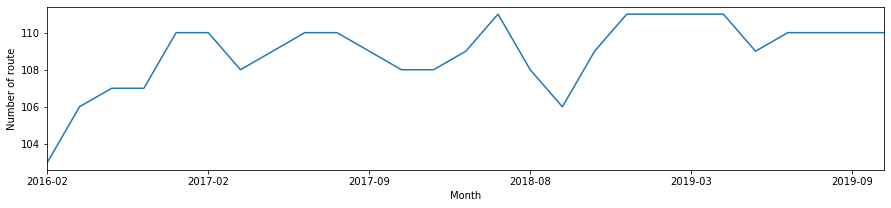

In [62]:
# prepare data
bus_routes_anal = pd.DataFrame(
    list(
        BusSubRoute.select(
            BusSubRoute.year, 
            BusSubRoute.month, 
            fn.COUNT(BusSubRoute.id).alias('Number of route')
        ).group_by(
            BusSubRoute.year, 
            BusSubRoute.month
        ).dicts()
    )
)

set_month_column(bus_routes_anal)
bus_routes_anal = bus_routes_anal.loc[:, ['Month', 'Number of route']]

# build the chart
bar_chr = bus_routes_anal.plot.bar(
    x='Month', 
    y='Number of route',
    rot=45,
    width=0.7,
    figsize=(15, 3),
    legend=False
)

line_chr = bus_routes_anal.plot(
    x='Month', 
    y='Number of route',
    figsize=(15, 3),
    legend=False
)

# set chart params
bar_chr.set_ylabel('Number of route')
for p in bar_chr.patches:
    bar_chr.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

line_chr.set_ylabel('Number of route')

**4. Number of bus shift in weekday.**

Text(0, 0.5, 'Number of bus shift')

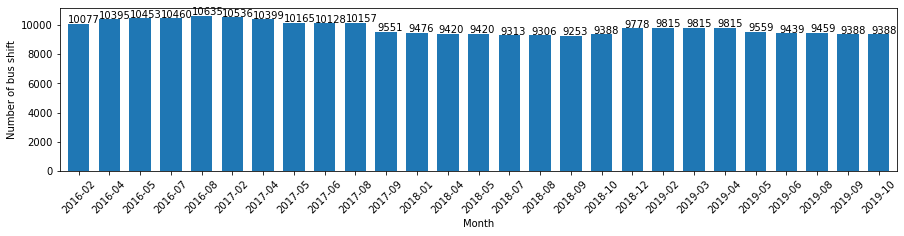

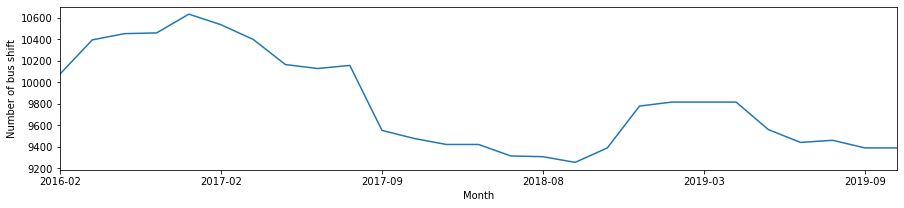

In [81]:
# prepare data
bus_shift_anal = pd.DataFrame(
    list(
        SubRouteSchedule.select(
            SubRouteSchedule.year, 
            SubRouteSchedule.month, 
            fn.COUNT(SubRouteSchedule.id).alias('Number of bus shift')
        ).where(
            SubRouteSchedule.day_type == 'weekdays'
        ).group_by(
            SubRouteSchedule.year, 
            SubRouteSchedule.month
        ).dicts()
    )
)

set_month_column(bus_shift_anal)
bus_shift_anal = bus_shift_anal.loc[:, ['Month', 'Number of bus shift']]

# build the chart
bar_chr = bus_shift_anal.plot.bar(
    x='Month', 
    y='Number of bus shift',
    rot=45,
    width=0.7,
    figsize=(15, 3),
    legend=False
)

line_chr = bus_shift_anal.plot(
    x='Month', 
    y='Number of bus shift',
    figsize=(15, 3),
    legend=False
)

# set chart params
bar_chr.set_ylabel('Number of bus shift')
for p in bar_chr.patches:
    bar_chr.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

line_chr.set_ylabel('Number of bus shift')

**5. Number of bus stops on different Parish.**

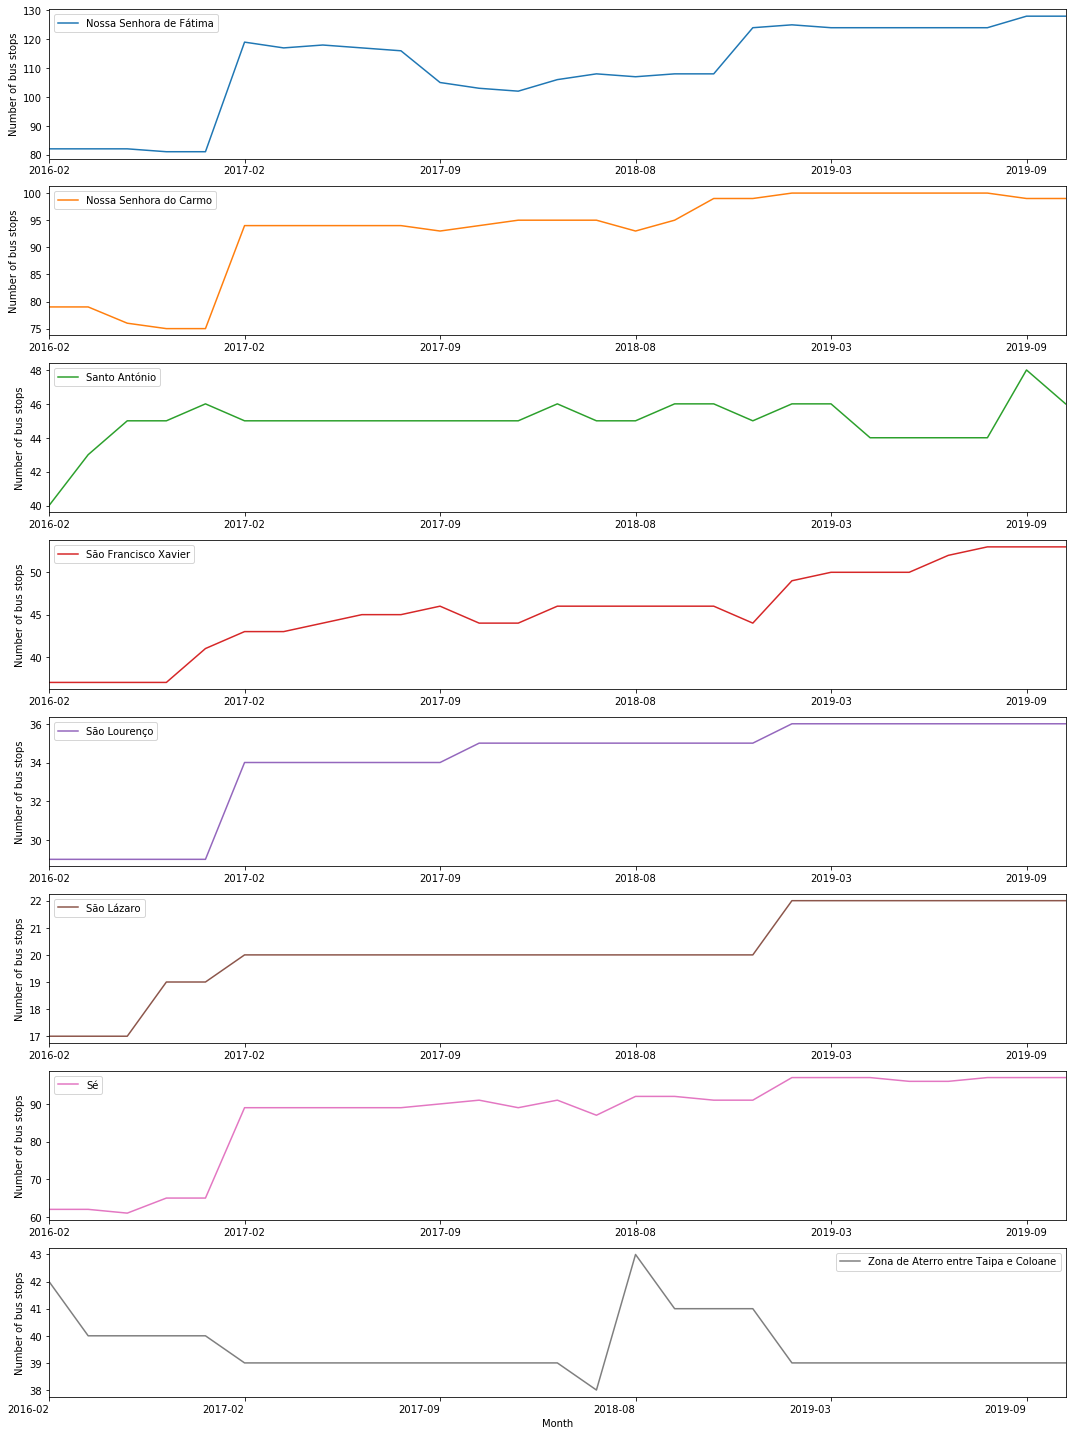

In [70]:
# prepare data
bus_stops_anal2 = pd.DataFrame(
    list(
        BusStop.select(
            BusStop.year, 
            BusStop.month, 
            Parish.name_por.alias('Parish'),
            fn.COUNT(BusStop.id).alias('Number of bus stops')
        ).where(
            BusStop.parish.is_null(False)
        ).join(
            Parish, on=(BusStop.parish == Parish.id)
        ).group_by(
            BusStop.year, 
            BusStop.month,
            BusStop.parish
        ).dicts()
    )
)

set_month_column(bus_stops_anal2)
bus_stops_anal2_result = pd.DataFrame()
bus_stops_anal2_result['Month'] = list(bus_stops_anal2.groupby(['Month']).count().index)

parishes_list = list(bus_stops_anal2.groupby(['Parish']).count().index)
parishes_list

for parish in parishes_list:
    stops_per_parish = bus_stops_anal2[bus_stops_anal2['Parish'] == parish].loc[:,['Month', 'Number of bus stops']]
    stops_per_parish.columns = ['Month', parish]
    bus_stops_anal2_result = bus_stops_anal2_result.merge(stops_per_parish, left_on = 'Month', right_on = 'Month')

# build the chart
line_chr2 = bus_stops_anal2_result.plot(
    x='Month', 
    rot=45,
    figsize=(15,20),
    subplots=True,
    sharex=True
)

# set chart params
for sub_line_chr in line_chr2:
    for p in sub_line_chr.patches:
        sub_line_chr.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
    sub_line_chr.xaxis.set_tick_params(rotation=0, which='both', labelbottom=True)
    sub_line_chr.set_ylabel('Number of bus stops')
    sub_line_chr.set_xlabel('Month')

plt.tight_layout()

**6. Top 10 bus stop that pass by most no. of routes**

In [68]:
# prepare data
bus_routes_anal_by_stop = pd.DataFrame(
    list(
        SubRouteStop.select(
            SubRouteStop.year, 
            SubRouteStop.month, 
            BusStop.name_cht.alias('Bus Stop'),
            fn.COUNT(SubRouteStop.id).alias('Number of routes')
        ).where(
            BusStop.parish.is_null(False)
        ).join(
            BusStop, on=(SubRouteStop.bus_stop == BusStop.id)
        ).group_by(
            SubRouteStop.year, 
            SubRouteStop.month,
            BusStop.name_por
        ).dicts()
    )
)

bus_routes_anal_by_stop

set_month_column(bus_routes_anal_by_stop)
bus_routes_anal_by_stop_result = {}
for month in list(bus_routes_anal_by_stop.groupby(['Month']).count().index):
    bus_routes_anal_by_stop_result[month] = bus_routes_anal_by_stop[bus_routes_anal_by_stop['Month'] == month].sort_values(by=['Number of routes'], ascending = False).reset_index().head(10).loc[:, ['Bus Stop', 'Number of routes']]
    bus_routes_anal_by_stop_result[month].index = np.arange(1, len(bus_routes_anal_by_stop_result[month]) + 1)
    bus_routes_anal_by_stop_result[month].index.name = 'Rank'

# print the tables
for month, bus_routes_anal_by_stop in bus_routes_anal_by_stop_result.items():
    print('In {month}: '.format(month = month))
    print(bus_routes_anal_by_stop)
    print('**************************************************')
    print()

In 2016-02: 
        Bus Stop  Number of routes
Rank                              
1          亞馬喇前地                65
2           關閘總站                37
3           媽閣總站                23
4           外港碼頭                22
5          石排灣總站                22
6           葡京酒店                20
7         蘇利安圓形地                20
8         路氹邊檢大樓                18
9           台山街市                18
10    水坑尾/公共行政大樓                17
**************************************************

In 2016-04: 
       Bus Stop  Number of routes
Rank                             
1         亞馬喇前地                68
2          關閘總站                37
3          媽閣總站                24
4         石排灣總站                24
5          外港碼頭                22
6        蘇利安圓形地                21
7          葡京酒店                20
8          泉亮花園                20
9          湖畔大廈                19
10    孫逸仙馬路/三家村                18
**************************************************

In 2016-05: 
       Bus Stop  Number of ro

**7. Top 10 longest distance of bus route.**

In [69]:
# prepare data
route_distance_ranking = pd.DataFrame(
    list(
        SubRouteDistance.select(
            SubRouteDistance.year, 
            SubRouteDistance.month, 
            BusSubRoute.sub_route_code.alias('Route Code'),
            fn.SUM(SubRouteDistance.distance).alias('Total Distance')
        ).join(
            BusSubRoute, on=(SubRouteDistance.sub_route == BusSubRoute.id)
        ).group_by(
            SubRouteDistance.year, 
            SubRouteDistance.month, 
            BusSubRoute.sub_route_code
        ).dicts()
    )
)

set_month_column(route_distance_ranking)
route_distance_ranking_result = {}
for month in list(route_distance_ranking.groupby(['Month']).count().index):
    route_distance_ranking_result[month] = route_distance_ranking[route_distance_ranking['Month'] == month].sort_values(by=['Total Distance'], ascending = False).reset_index().head(10).loc[:, ['Route Code', 'Total Distance']]
    route_distance_ranking_result[month].index = np.arange(1, len(route_distance_ranking_result[month]) + 1)
    route_distance_ranking_result[month].index.name = 'Rank'

# print the tables
for month, route_distance_ranking in route_distance_ranking_result.items():
    print('In {month}: '.format(month = month))
    print(route_distance_ranking)
    print('**************************************************')
    print()

In 2016-02: 
     Route Code  Total Distance
Rank                           
1            26       48.884649
2           21A       43.199310
3            25       40.143834
4           26A       40.083776
5            73       33.265359
6            15       32.686540
7           MT4       29.937282
8            N5       29.867948
9            59       29.711536
10           N2       29.361851
**************************************************

In 2016-04: 
     Route Code  Total Distance
Rank                           
1            26       48.892382
2           21A       44.349032
3            25       40.143834
4           26A       40.083776
5            73       33.265360
6            15       32.686540
7           MT4       29.937282
8            59       29.711536
9            N2       29.361851
10           N3       29.022110
**************************************************

In 2016-05: 
     Route Code  Total Distance
Rank                           
1            26       48.